In [9]:
from pv_analyzer import pv_analyze
import numpy as np
from lteanalysis import LTEAnalysis
import matplotlib.pyplot as plt
import os
import pandas as pd

In [10]:
%matplotlib widget

In [11]:
def emp_kep_v(v_rot, v_100):        
        r_au = 100.*np.power(v_100/v_rot, 2)
        return r_au

def emp_kep_r(r, r_b, v_100):
        v_r = v_100*(r/r_b)**(-0.5)
        return v_r

In [12]:
# define fix r points
# Get equidistance points

r_au_empkep_rs_fix_r = np.arange(start=42., step=42., stop=840.)
r_au_empkep_bs_fix_r = -r_au_empkep_rs_fix_r
v_100 = 2.842 #kmps
v_rot_empkep_rs_fix_r =  emp_kep_r(r=r_au_empkep_rs_fix_r, r_b=100., v_100=v_100)
v_rot_empkep_bs_fix_r = - v_rot_empkep_rs_fix_r

plot_points = [r_au_empkep_rs_fix_r, v_rot_empkep_rs_fix_r, r_au_empkep_bs_fix_r, v_rot_empkep_bs_fix_r]

#### For Rs

##### Data acquisition

In [13]:

# Create dataframe
colnms_b7 = ['tb_b7_'+str(i+69) for i in range(-5,5)]
colnms_b6 = ['tb_b6_'+str(i+69) for i in range(-5,5)]

Tb_df_b7_rs = pd.DataFrame(columns=colnms_b7)
Tb_df_b6_rs = pd.DataFrame(columns=colnms_b6)
Tb_df_b7_rs["r_rs"] = r_au_empkep_rs_fix_r
Tb_df_b6_rs["r_rs"] = v_rot_empkep_rs_fix_r

for i in range(-15,5):

    if i in range(-14, -5):
        continue


    # File names
    pv_b6_name = "uid___A002_b_6.cal.l1489_irs.spw_1_7.line.cube.clean.c_baseline_0.image.pbcor.Regridded.Smoothened."
    ext = "PV_" + str(i+69) + "_w_1.fits"
    pv_b6_name = pv_b6_name + ext
    pv_b6_name = os.path.join(os.path.abspath(os.getcwd()),"surrounding_cuts_b6",pv_b6_name)

    pv_b7_name = "uid___A002_Xb5ee5a_X288a.ms.split.cal.l1489irs.spw3.cvel_chavg2.cube.clean_2_6_8_05.image.pbcor.regridded.smoothened."
    ext = "PV_" + str(i+69) + "_w_1.fits"
    pv_b7_name = pv_b7_name + ext
    pv_b7_name = os.path.join(os.path.abspath(os.getcwd()),"surrounding_cuts_b7",pv_b7_name)

    # Read PV
    # Read b7 data
    pv_b7 = pv_analyze(pv_path= pv_b7_name, is_Tb=True, v_sys=7.33)
    pv_b7.read_pv(print_details = False)
    # Read band 6 data
    pv_b6 = pv_analyze(pv_path= pv_b6_name, is_Tb=True, v_sys=7.33)
    pv_b6.read_pv(print_details = False)


    Tb_b7_i_df = pv_b7.get_tb_on_curve(curve_function = plot_points, 
                                        get_surrounding_pix = False, mode='vals',
                                        num_pix = 3, return_coords=True)  
    Tb_df_b7_rs["tb_b7_"+str(i+69)] = Tb_b7_i_df["Tb_on_point_rs"]
    Tb_df_b7_rs["r_rs"] = Tb_b7_i_df["r_rs"]

    Tb_b6_i_df = pv_b6.get_tb_on_curve(curve_function = plot_points, 
                                        get_surrounding_pix = False, mode='vals',
                                        num_pix = 3, return_coords=True)
    Tb_df_b6_rs["tb_b6_"+str(i+69)] = Tb_b6_i_df["Tb_on_point_rs"]
    Tb_df_b6_rs["r_rs"] = Tb_b6_i_df["r_rs"]


Convert frequency to velocity
 rms = 1.11 K
Convert frequency to velocity
 rms = 0.52 K
Convert frequency to velocity
 rms = 0.98 K
Convert frequency to velocity
 rms = 0.50 K
Convert frequency to velocity
 rms = 0.97 K
Convert frequency to velocity
 rms = 0.49 K
Convert frequency to velocity
 rms = 0.99 K
Convert frequency to velocity
 rms = 0.49 K
Convert frequency to velocity
 rms = 1.03 K
Convert frequency to velocity
 rms = 0.49 K
Convert frequency to velocity
 rms = 1.06 K
Convert frequency to velocity
 rms = 0.49 K
Convert frequency to velocity
 rms = 1.08 K
Convert frequency to velocity
 rms = 0.49 K
Convert frequency to velocity
 rms = 1.07 K
Convert frequency to velocity
 rms = 0.49 K
Convert frequency to velocity
 rms = 1.05 K
Convert frequency to velocity
 rms = 0.49 K
Convert frequency to velocity
 rms = 1.05 K
Convert frequency to velocity
 rms = 0.49 K
Convert frequency to velocity
 rms = 1.06 K
Convert frequency to velocity
 rms = 0.49 K


##### Visualization

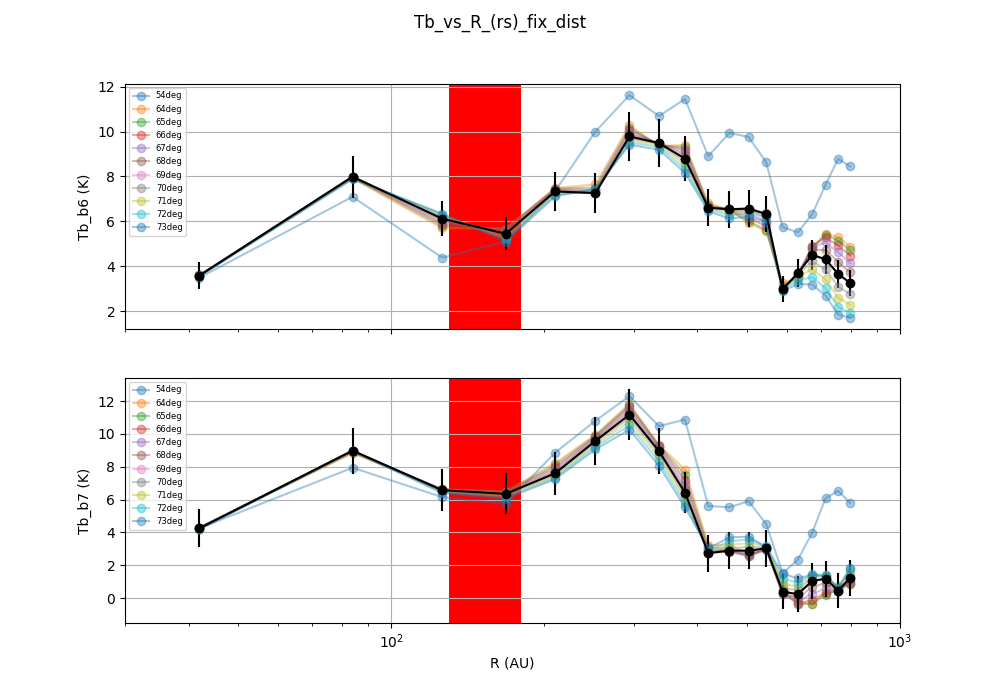

In [14]:
# Visualization


vis_results_fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)

for i in range(-15,5):

    if i in range(-14, -5):
        continue


    axes[0].plot(np.array(Tb_df_b6_rs["r_rs"])*140., Tb_df_b6_rs["tb_b6_"+str(i+69)], marker='o', alpha = 0.4, label = str(i+69) + "deg")

    if i == 0:
        axes[0].errorbar(np.array(Tb_df_b6_rs["r_rs"])*140., Tb_df_b6_rs["tb_b6_"+str(i+69)], 
                    yerr=np.array([np.sqrt(0.49**2 + (tb6*0.1)**2) for tb6 in Tb_df_b6_rs["tb_b6_"+str(i+69)]]),   
                    marker='o', color = 'k')
    axes[0].axvspan(xmin = 130, xmax=180, facecolor='r', alpha=0.5)
    axes[0].set_ylabel(r"Tb_b6 (K)")
    axes[0].grid(True)
    axes[0].legend(prop={'size': 6})



    axes[1].plot(np.array(Tb_df_b7_rs["r_rs"])*140., Tb_df_b7_rs["tb_b7_"+str(i+69)], marker='o', alpha = 0.4, label = str(i+69) + "deg")
    if i == 0:
        axes[1].errorbar(np.array(Tb_df_b7_rs["r_rs"])*140., Tb_df_b7_rs["tb_b7_"+str(i+69)], 
                    yerr=np.array([np.sqrt(1.08**2 + (tb7*0.1)**2) for tb7 in Tb_df_b7_rs["tb_b7_"+str(i+69)]]),   
                    marker='o', color = 'k')
  
    axes[1].axvspan(xmin = 130, xmax=180, facecolor='r', alpha=0.5)
    axes[1].set_ylabel(r"Tb_b7 (K)")
    axes[1].grid(True)
    axes[1].legend(prop={'size': 6})
    axes[1].set_xlim((30,1000))
    axes[1].set_xlabel("R (AU)")
    axes[1].set_xscale("log")

vis_results_fig.suptitle("Tb_vs_R_(rs)_fix_dist")

vis_results_figname =  'Tb_rs_vs_r.jpg'
dir_path = os.path.join(os.path.abspath(os.getcwd()),"PV_comparision_results",)


if not os.path.isdir(dir_path):
    os.mkdir(dir_path)
vis_results_figpath = os.path.join(dir_path, vis_results_figname)
vis_results_fig.savefig(fname = vis_results_figpath, dpi=300, format='jpeg')

#### For bs

##### Data acquisition

In [15]:

# Create dataframe
colnms_b7 = ['tb_b7_'+str(i+69) for i in range(-5,5)]
colnms_b6 = ['tb_b6_'+str(i+69) for i in range(-5,5)]

Tb_df_b7_bs = pd.DataFrame(columns=colnms_b7)
Tb_df_b6_bs = pd.DataFrame(columns=colnms_b6)
Tb_df_b7_bs["r_bs"] = v_rot_empkep_bs_fix_r
Tb_df_b6_bs["r_bs"] = v_rot_empkep_bs_fix_r

for i in range(-15,5):

    if i in range(-14, -5):
        print(i)
        continue

    # File names
    pv_b6_name = "uid___A002_b_6.cal.l1489_irs.spw_1_7.line.cube.clean.c_baseline_0.image.pbcor.Regridded.Smoothened."
    ext = "PV_" + str(i+69) + "_w_1.fits"
    pv_b6_name = pv_b6_name + ext
    pv_b6_name = os.path.join(os.getcwd(),"surrounding_cuts_b6",pv_b6_name)

    pv_b7_name = "uid___A002_Xb5ee5a_X288a.ms.split.cal.l1489irs.spw3.cvel_chavg2.cube.clean_2_6_8_05.image.pbcor.regridded.smoothened."
    ext = "PV_" + str(i+69) + "_w_1.fits"
    pv_b7_name = pv_b7_name + ext
    pv_b7_name = os.path.join(os.getcwd(),"surrounding_cuts_b7",pv_b7_name)

    # Read PV
    # Read b7 data
    pv_b7 = pv_analyze(pv_path= pv_b7_name, is_Tb=True, v_sys=7.27)
    pv_b7.read_pv(print_details = False)
    # Read band 6 data
    pv_b6 = pv_analyze(pv_path= pv_b6_name, is_Tb=True, v_sys=7.27)
    pv_b6.read_pv(print_details = False)

    Tb_b7_i_df = pv_b7.get_tb_on_curve(curve_function = plot_points, 
                                        get_surrounding_pix = False, mode='vals',
                                        num_pix = 3, return_coords=True)  


    Tb_df_b7_bs["tb_b7_"+str(i+69)] = Tb_b7_i_df["Tb_on_point_bs"]
    Tb_df_b7_bs["r_bs"] = Tb_b7_i_df["r_bs"]

    Tb_b6_i_df = pv_b6.get_tb_on_curve(curve_function = plot_points, 
                                        get_surrounding_pix = False, mode='vals',
                                        num_pix = 3, return_coords=True)
    Tb_df_b6_bs["tb_b6_"+str(i+69)] = Tb_b6_i_df["Tb_on_point_bs"]
    Tb_df_b6_bs["r_bs"] = Tb_b6_i_df["r_bs"]


Convert frequency to velocity
 rms = 1.11 K
Convert frequency to velocity
 rms = 0.52 K
-14
-13
-12
-11
-10
-9
-8
-7
-6
Convert frequency to velocity
 rms = 0.98 K
Convert frequency to velocity
 rms = 0.50 K
Convert frequency to velocity
 rms = 0.97 K
Convert frequency to velocity
 rms = 0.49 K
Convert frequency to velocity
 rms = 0.99 K
Convert frequency to velocity
 rms = 0.49 K
Convert frequency to velocity
 rms = 1.03 K
Convert frequency to velocity
 rms = 0.49 K
Convert frequency to velocity
 rms = 1.06 K
Convert frequency to velocity
 rms = 0.49 K
Convert frequency to velocity
 rms = 1.08 K
Convert frequency to velocity
 rms = 0.49 K
Convert frequency to velocity
 rms = 1.07 K
Convert frequency to velocity
 rms = 0.49 K
Convert frequency to velocity
 rms = 1.05 K
Convert frequency to velocity
 rms = 0.49 K
Convert frequency to velocity
 rms = 1.05 K
Convert frequency to velocity
 rms = 0.49 K
Convert frequency to velocity
 rms = 1.06 K
Convert frequency to velocity
 rms = 0.49 K


##### Visualization

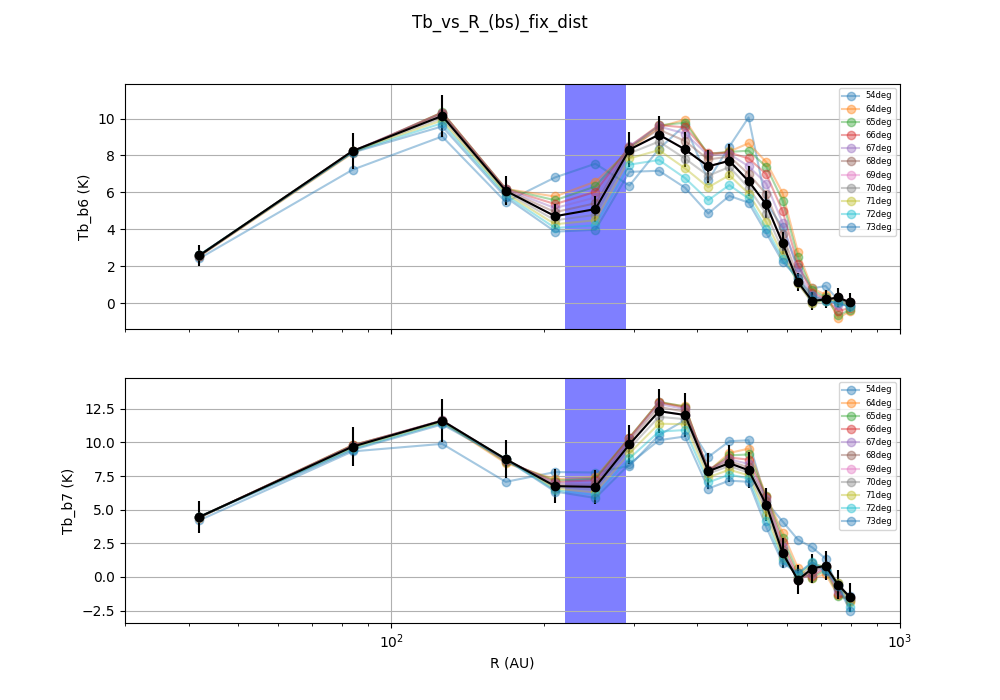

In [16]:
# Visualization

vis_results_fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)

axes[0].axvspan(xmin = 220, xmax=290, facecolor='b', alpha=0.5)
axes[1].axvspan(xmin = 220, xmax=290, facecolor='b', alpha=0.5)

for i in range(-15,5):

    if i in range(-14, -5):
        continue

    axes[0].plot(np.array(-Tb_df_b6_bs["r_bs"])*140., Tb_df_b6_bs["tb_b6_"+str(i+69)], marker='o', alpha = 0.4, label = str(i+69) + "deg")

    if i == 0:
        axes[0].errorbar(-np.array(Tb_df_b6_bs["r_bs"])*140., Tb_df_b6_bs["tb_b6_"+str(i+69)], 
                    yerr=np.array([np.sqrt(0.49**2 + (tb6*0.1)**2) for tb6 in Tb_df_b6_bs["tb_b6_"+str(i+69)]]),   
                    marker='o', color = 'k')

    axes[0].set_ylabel(r"Tb_b6 (K)")
    axes[0].grid(True)
    axes[0].legend(prop={'size': 6})

    axes[1].plot(np.array(-Tb_df_b7_bs["r_bs"])*140., Tb_df_b7_bs["tb_b7_"+str(i+69)], marker='o', alpha = 0.4, label = str(i+69) + "deg")
    if i == 0:
        axes[1].errorbar(-np.array(Tb_df_b7_bs["r_bs"])*140., Tb_df_b7_bs["tb_b7_"+str(i+69)], 
                    yerr=np.array([np.sqrt(1.08**2 + (tb7*0.1)**2) for tb7 in Tb_df_b7_bs["tb_b7_"+str(i+69)]]),   
                    marker='o', color = 'k')
  

    axes[1].set_ylabel(r"Tb_b7 (K)")
    axes[1].grid(True)
    axes[1].legend(prop={'size': 6})
    axes[1].set_xlim((30,1000))
    axes[1].set_xlabel("R (AU)")
    axes[1].set_xscale("log")

vis_results_fig.suptitle("Tb_vs_R_(bs)_fix_dist")

vis_results_figname =  'Tb_bs_vs_r.jpg'
dir_path = os.path.join(os.path.abspath(os.getcwd()),"PV_comparision_results",)


if not os.path.isdir(dir_path):
    os.mkdir(dir_path)
vis_results_figpath = os.path.join(dir_path, vis_results_figname)
vis_results_fig.savefig(fname = vis_results_figpath, dpi=300, format='jpeg')